In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
V = [0.13, 0.25, 0.45, 0.65, 0.85, 1.09, 1.25, 1.47, 1.65, 1.85, 2.05, 2.25, 2.45, 2.65, 2.85, 3.05]
r_p = [0.28861, 0.28242, 0.26552, 0.24130, 0.21440, 0.17920, 0.15900, 0.13350, 0.11430, 0.096200, 0.082700, 0.070600, 0.060520, 0.051700, 0.044700, 0.038600]
r_m = [0.18129, 0.18230, 0.18475, 0.18790, 0.19098, 0.19504, 0.19775, 0.20109, 0.20413, 0.20775, 0.21060, 0.21382, 0.21693, 0.22037, 0.22354, 0.22673]
l_p = 30e-2
s_p = 3e-2 * 5e-2
l_m = 26.6
s_m = np.pi * 0.07e-2 / 4
t0 = 26
alpha = 41
t = list(map(lambda x: t0 + 273.15 + alpha * x, V))
sigma_p = list(map(lambda x: l_p/(x*s_p*1e3), r_p))
sigma_m = list(map(lambda x: l_m/(x*s_m*1e3), r_m))
ln_sigma_p = list(map(lambda x: np.log(x), sigma_p))
ln_sigma_m = list(map(lambda x: np.log(x), sigma_m))
t_inv = t_inv = list(map(lambda x: 1/(x+273.15), t))

t = np.array(t)
t_inv = np.array(t_inv)
sigma_p = np.array(sigma_p)
sigma_m = np.array(sigma_m)
ln_sigma_p = np.array(ln_sigma_p)
ln_sigma_m = np.array(ln_sigma_m)

print(t)

[304.48 309.4  317.6  325.8  334.   343.84 350.4  359.42 366.8  375.
 383.2  391.4  399.6  407.8  416.   424.2 ]


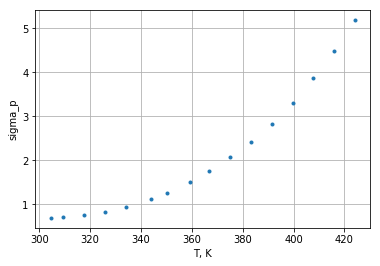

In [3]:
x = t[0:len(sigma_p)]
y = sigma_p
plt.ylabel('sigma_p')
plt.xlabel('T, K')
plt.grid(b=True, which='major', axis='both', alpha=1)
plt.grid(b=True, which='minor', axis='both', alpha=1)

plt.plot(x, y, 'o', markersize=3)
plt.savefig('lab_11_1_sigma_p_t.png', dpi=1000)

[-7965.82705577    13.03642666]
[137.6202096894208, 0.21297482773581572]
delta =  1.3728832570441154
delta_delta =  0.023718376056979986


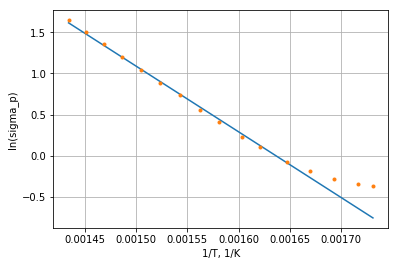

In [4]:
x = t_inv[0:len(ln_sigma_p)]
y = ln_sigma_p
plt.ylabel('ln(sigma_p)')
plt.xlabel('1/T, 1/K')
plt.grid(b=True, which='major', axis='both', alpha=1)
plt.grid(b=True, which='minor', axis='both', alpha=1)

fit = np.polyfit(x[3:], y[3:], 1, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
print(params)
print(cov)

a = params[0]
delta_a = cov[0]

plt.plot(x, params[0]*x + params[1])
plt.plot(x, y, 'o', markersize=3)
plt.savefig('lab_11_1_ln_sigma_p_t.png', dpi=1000)

k = 8.6173303e-5
delta = -a * 2 * k
delta_delta = delta_a * 2 * k
print('delta = ',  delta)
print('delta_delta = ', delta_delta)

[ -0.45939235 406.58024727]
[0.006852556359513413, 2.501055610661083]


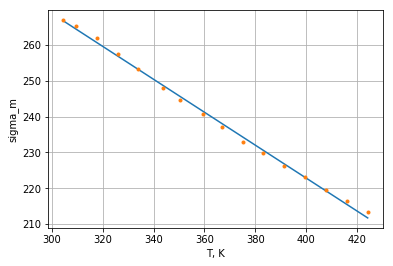

In [5]:
x = t[0:len(sigma_m)]
y = sigma_m
plt.ylabel('sigma_m')
plt.xlabel('T, K')
plt.grid(b=True, which='major', axis='both', alpha=1)
plt.grid(b=True, which='minor', axis='both', alpha=1)

fit = np.polyfit(x, y, 1, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
print(params)
print(cov)

plt.plot(x, params[0]*x + params[1])
plt.plot(x, y, 'o', markersize=3)
plt.savefig('lab_11_1_sigma_m_t.png', dpi=1000)

[8.02466530e-06 1.27834064e-03]
[6.541789358945218e-08, 2.3876314358565447e-05]


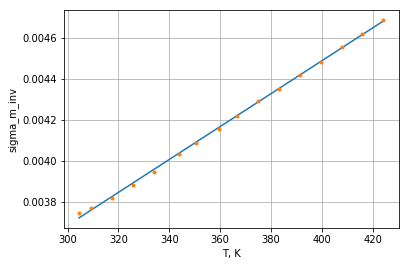

In [6]:
sigma_m_inv = list(map(lambda x: 1/x, sigma_m))
x = t[0:len(sigma_m)]
y = sigma_m_inv
plt.ylabel('sigma_m_inv')
plt.xlabel('T, K')
plt.grid(b=True, which='major', axis='both', alpha=1)
plt.grid(b=True, which='minor', axis='both', alpha=1)

fit = np.polyfit(x, y, 1, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
print(params)
print(cov)

plt.plot(x, params[0]*x + params[1])
plt.plot(x, y, 'o', markersize=3)
plt.savefig('lab_11_1_sigma_m_inv_t.png', dpi=1000)

In [7]:
print(l_m, s_m)

26.6 0.0005497787143782138


In [9]:
8.024e-6*l_m/s_m

0.38822601606428797